In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import os

In [2]:
path=r'C:\Users\dell\Desktop\plant seeding\train'
# C:\Users\dell\Desktop\plant seeding\output

In [3]:

class_folder=os.listdir(path)
num_classes=len(class_folder)

In [4]:
data=[]
labels=[]
for id,class_name in enumerate(class_folder):
  class_path=os.path.join(path,class_name)
  for image_name in os.listdir(class_path):
    image_path=os.path.join(class_path,image_name)
    image=cv2.imread(image_path)
    image=cv2.resize(image,(224,224))
    data.append(image)
    labels.append(id)

In [5]:
data=np.array(data)
labels=np.array(labels)

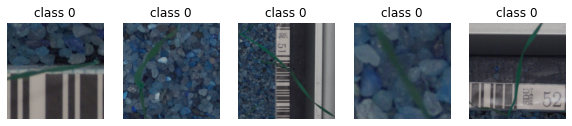

In [6]:
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(data[i])
  plt.title(f"class {labels[i]}")
  plt.axis('off')
plt.show()

In [7]:
clean_data=[]
examples=[]
for img in data:
  # use gaussian blur
  blurImg=cv2.GaussianBlur(img,(5,5),0)
  # converting the hsv image
  hsv_img=cv2.cvtColor(blurImg,cv2.COLOR_BGR2HSV)
  # create mask
  lower_green=(25,40,50)
  upper_green=(75,255,255)
  mask=cv2.inRange(hsv_img,lower_green,upper_green)
  kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))
  mask=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel)
  # create bool mask
  b_mask=mask>0
  # apply the mask
  new_data=np.zeros_like(img,np.uint8)
  # Apply boolean mask to the origin image
  new_data[b_mask]=img[b_mask]
  # append image without background
  clean_data.append(new_data)


In [8]:
clean_data=np.asarray(clean_data)

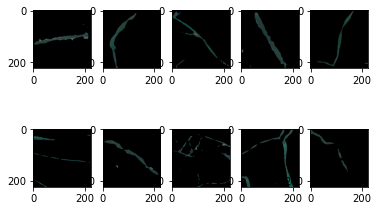

In [10]:
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(clean_data[i])

In [16]:
output_file=r'C:\Users\dell\Desktop\plant seeding\output'

In [17]:
for i,img in enumerate(clean_data):
  filename=f'clean_image_{i}.png'
  filepath=output_file+filename
  cv2.imwrite(filepath,img)

In [9]:
classes = {}
for class_name in os.listdir(path):
    classes[class_name] = len(os.listdir(os.path.join(path, class_name)))
print(classes)

{'Black-grass': 263, 'Charlock': 390, 'Cleavers': 287, 'Common Chickweed': 611, 'Common wheat': 221, 'Fat Hen': 475, 'Loose Silky-bent': 654, 'Maize': 221, 'Scentless Mayweed': 516, 'Shepherds Purse': 231, 'Small-flowered Cranesbill': 496, 'Sugar beet': 385}


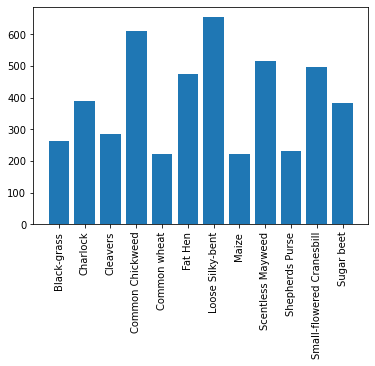

In [12]:
plt.bar(classes.keys(), classes.values())
plt.xticks(rotation=90)
plt.show()